# AMPEROMETRO

OBIETTIVO: stima della resistenza interna dell'amperometro

usando resistenze dell'ordine dei Ω misuriamo la corrente di una resistenza equivalente data da $R_{eq} = R_a + R$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

NOTA: a disposizione avevamo solo a disposizione resistenze con valori interi da 1 a 10 Ω

In [2]:
dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'amperometro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(OHM)']) # ohm
sigmaRpercent = 0.02
sigmaR = R*sigmaRpercent

V = np.array(fr['V']) # volt
sigmaVpercent = 0.01
sigmaV = V*sigmaVpercent

I = np.array(fr['I(mA)']) * 10**-3 # milli ampere
sigmaIpercent = 0.01
sigmaI = I*sigmaIpercent

In [3]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

In [7]:
def R_VI(VI,Ra):
    return (VI - Ra)

i = Interpolazione(V/I,R,R_VI,sigmaR,p0=[1])
print(i)

   
Parameters: [0.98259653] 
Sigma parameters: [0.01310102]

sigmaY: [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2 ]

chiquadro ridotto: 0.31
df: 9
pvalue: 100.0%
covariance matrix: [[0.00013903]]    



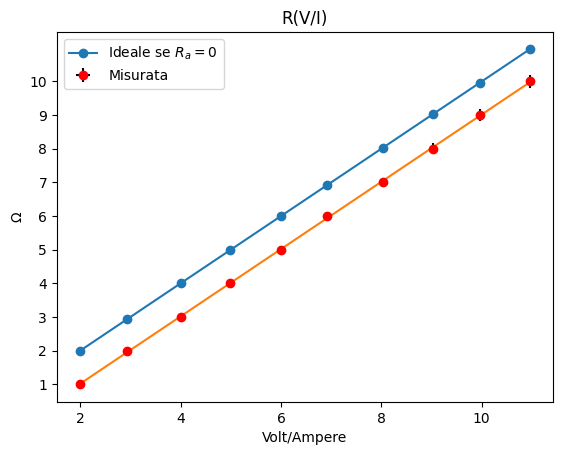

In [9]:
plt.title("R(V/I)")
plt.errorbar(V/I,R,xerr=sigmaI,yerr=sigmaR,marker='o',color='red',ecolor='black',linestyle='None', label='Misurata')
plt.plot(V/I,V/I,marker='o', label='Ideale se $R_a = 0$')
plt.plot(i.x_best,i.y_best)
plt.ylabel('Ω')
plt.xlabel('Volt/Ampere')
plt.yticks(R)
plt.legend()
plt.show()

### Calcolo $R_a$

In [10]:
print(final_val(i.bval[0],i.sigma_bval[0],udm='Ω'))

0.98 ± 0.01 Ω
